In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import ydata_profiling as pp

In [57]:
# the goal of this project is to predict restaurant revenue in the test set of Turkish restaurant with a small train dataset
# the data is from Kaggle (link=https://www.kaggle.com/c/restaurant-revenue-prediction/data)

In [ ]:
'''Case description from Kaggle:
TFI has provided a dataset with 137 restaurants in the training set, and a test set of 100000 restaurants. 
The data columns include the open date, location, city type, and three categories of obfuscated data: Demographic data, Real estate data, and Commercial data. 
The revenue column indicates a (transformed) revenue of the restaurant in a given year and is the target of predictive analysis. '''

In [3]:
data = pd.read_csv('/home/jan-willem/Documents/Kaggle beginner projects/restaurant-revenue-prediction/train.csv')
data.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [4]:
test = pd.read_csv('/home/jan-willem/Documents/Kaggle beginner projects/restaurant-revenue-prediction/test.csv')
test.head(15)

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,...,2.0,3.0,0,0,0,0,0,0,0,0
1,1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,...,1.0,3.0,0,0,0,0,0,0,0,0
2,2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,...,2.0,3.0,0,0,0,0,0,0,0,0
3,3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,...,2.0,3.0,0,4,0,0,0,0,0,0
4,4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,...,5.0,3.0,0,0,0,0,0,0,0,0
5,5,11/29/2007,Eskişehir,Other,FC,4,4.5,5.0,4.0,2,...,2.0,3.0,0,0,0,0,0,0,0,0
6,6,11/05/2008,Rize,Other,FC,4,2.0,4.0,4.0,2,...,1.0,3.0,3,5,4,1,2,0,0,0
7,7,12/03/2013,Ankara,Big Cities,IL,2,5.0,4.0,5.0,2,...,3.0,1.0,3,0,0,0,3,0,4,4
8,8,05/30/2006,İstanbul,Big Cities,IL,5,4.0,4.0,4.0,1,...,5.0,1.0,0,4,0,0,3,5,0,0
9,9,01/20/2012,İstanbul,Big Cities,IL,15,7.5,6.0,3.0,4,...,1.0,2.5,20,2,0,2,24,4,0,3


In [5]:
# first some (automated) EDA using profile report 

In [6]:
#pp.ProfileReport(data)

In [7]:
# some observations based on the automated EDA
# lot of variables (dimensionality reduction might be needed)
# complete dataset no missing values. 
# most variables are integers/floats (numerical) - not specified what they exactly are.
# most variables are distributed with a skew so (log) transformations might be needed
# all variables are positively correlated with each other and with the target. 

In [8]:
data.columns

Index(['Id', 'Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37', 'revenue'],
      dtype='object')

In [9]:
data.shape

(137, 43)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          137 non-null    int64  
 1   Open Date   137 non-null    object 
 2   City        137 non-null    object 
 3   City Group  137 non-null    object 
 4   Type        137 non-null    object 
 5   P1          137 non-null    int64  
 6   P2          137 non-null    float64
 7   P3          137 non-null    float64
 8   P4          137 non-null    float64
 9   P5          137 non-null    int64  
 10  P6          137 non-null    int64  
 11  P7          137 non-null    int64  
 12  P8          137 non-null    int64  
 13  P9          137 non-null    int64  
 14  P10         137 non-null    int64  
 15  P11         137 non-null    int64  
 16  P12         137 non-null    int64  
 17  P13         137 non-null    float64
 18  P14         137 non-null    int64  
 19  P15         137 non-null    i

In [11]:
data.describe()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02
mean,68.000000,4.014599,4.408759,4.317518,4.372263,2.007299,3.357664,5.423358,5.153285,5.445255,...,3.135036,2.729927,1.941606,2.525547,1.138686,2.489051,2.029197,2.211679,1.116788,4.453533e+06
std,39.692569,2.910391,1.514900,1.032337,1.016462,1.209620,2.134235,2.296809,1.858567,1.834793,...,1.680887,5.536647,3.512093,5.230117,1.698540,5.165093,3.436272,4.168211,1.790768,2.576072e+06
min,0.000000,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.149870e+06
25%,34.000000,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,...,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.999068e+06
50%,68.000000,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,5.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.939804e+06
75%,102.000000,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,...,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,5.166635e+06
max,136.000000,12.000000,7.500000,7.500000,7.500000,8.000000,10.000000,10.000000,10.000000,10.000000,...,7.500000,25.000000,15.000000,25.000000,6.000000,24.000000,15.000000,20.000000,8.000000,1.969694e+07


In [12]:
# data transformations 
# start with creating a years_open variable based on opening date
years_open = (pd.to_datetime('1-1-2015') - pd.to_datetime(data['Open Date'])).astype(str).str.split(' ').apply(lambda x:int(x[0])/365)
years_open

0      15.471233
1       6.884932
2       1.816438
3       2.915068
4       5.652055
         ...    
132     6.523288
133     8.227397
134     8.490411
135     4.178082
136     5.336986
Name: Open Date, Length: 137, dtype: float64

In [13]:
data['years_open'] = years_open 

In [14]:
# create dummies for city type and city group
dummy_vars = pd.get_dummies(data[['City Group', 'Type']])
dummy_vars

,City Group_Big Cities,City Group_Other,Type_DT,Type_FC,Type_IL
0,1,0,0,0,1
1,1,0,0,1,0
2,0,1,0,0,1
3,0,1,0,0,1
4,0,1,0,0,1
...,...,...,...,...,...
132,0,1,0,1,0
133,1,0,0,1,0
134,0,1,0,1,0
135,1,0,0,1,0


In [15]:
data = pd.concat([data, dummy_vars], axis=1)
data

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P35,P36,P37,revenue,years_open,City Group_Big Cities,City Group_Other,Type_DT,Type_FC,Type_IL
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,4,3,4,5653753.0,15.471233,1,0,0,0,1
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,0,0,0,6923131.0,6.884932,1,0,0,1,0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,0,0,0,2055379.0,1.816438,0,1,0,0,1
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,12,12,6,2675511.0,2.915068,0,1,0,0,1
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,4,3,3,4316715.0,5.652055,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,06/25/2008,Trabzon,Other,FC,2,3.0,3.0,5.0,4,...,0,0,0,5787594.0,6.523288,0,1,0,1,0
133,133,10/12/2006,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,...,0,0,0,9262754.0,8.227397,1,0,0,1,0
134,134,07/08/2006,Kayseri,Other,FC,3,4.0,4.0,4.0,2,...,0,0,0,2544857.0,8.490411,0,1,0,1,0
135,135,10/29/2010,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,...,0,0,0,7217634.0,4.178082,1,0,0,1,0


In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
pca = PCA()
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37', 'years_open', 'City Group_Big Cities', 'City Group_Other','Type_DT','Type_FC','Type_IL']])
data_pca = pca.fit_transform(data_scaled)
data_pca

array([[ 1.23773229e+00, -2.60367900e+00, -1.04175319e+00, ...,
         1.34849641e-01,  8.92365222e-16,  1.50531050e-16],
       [-2.62332583e+00,  6.80276484e-01, -1.22336004e+00, ...,
        -6.06534958e-03,  6.57464190e-15, -5.32103699e-19],
       [-2.87885760e+00, -3.64408578e-01,  1.83969409e+00, ...,
         2.28203772e-02,  2.35334189e-15, -2.13228274e-16],
       ...,
       [-2.90385714e+00,  6.68542285e-01,  1.06263981e+00, ...,
        -1.89951968e-02,  9.27676460e-16,  2.22428761e-16],
       [-2.62330811e+00,  9.38723111e-01, -4.70855998e-01, ...,
        -5.17758370e-02, -1.50666687e-16,  1.07809085e-16],
       [-2.85639146e+00,  6.28127372e-01, -9.59468807e-01, ...,
         1.39556363e-02, -1.41593545e-15, -2.10407016e-17]])

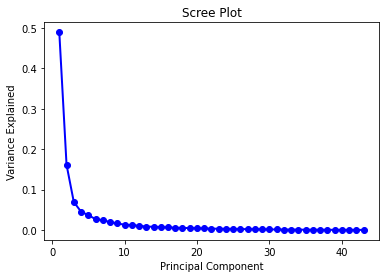

In [17]:
# scree plot 
# and use of elbow heuristic to decide how many principal components to include
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [18]:
data_pca = pd.DataFrame(data_pca[:,0:5])

In [19]:
data_pca.columns = ['pc'+str(i) for i in range(1,6)]
data_pca

,pc1,pc2,pc3,pc4,pc5
0,1.237732,-2.603679,-1.041753,-0.382121,0.181692
1,-2.623326,0.680276,-1.223360,-1.095141,-1.013890
2,-2.878858,-0.364409,1.839694,-0.054287,1.100760
3,10.697717,0.931816,4.660203,1.268964,1.461597
4,0.150329,-2.811725,1.817393,0.040522,0.087897
...,...,...,...,...,...
132,-3.360298,0.392597,1.144709,1.012818,1.797776
133,-2.551029,0.810002,-1.276364,-0.571444,0.459298
134,-2.903857,0.668542,1.062640,0.073808,-0.636040
135,-2.623308,0.938723,-0.470856,-1.526945,0.232505


In [20]:
# two pronged approach pca data and whole dataset. (since PCA is dodgy with dummies)

In [21]:
# because we want same sample handcode the train/test split
test_ind = np.random.randint(0,137,int(0.2*137))
train_ind = []
for i in range(0,137):
    if i not in test_ind:
        train_ind.append(i)
train_ind = np.array(train_ind)

In [22]:
target = np.log(data['revenue'])

In [23]:
X_test1 = data_pca.iloc[test_ind,:]
X_train1 = data_pca.iloc[train_ind,:]
y_test1 = target[test_ind]
y_train1 = target[train_ind]

In [24]:
data_nopca = data[['P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37', 'years_open', 'City Group_Big Cities', 'City Group_Other','Type_DT','Type_FC','Type_IL']]

# log transform features to normalize them - to a certain extent 

data_nopca[['P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37', 'years_open']] = np.log(data_nopca[['P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37', 'years_open']]+1).copy()

/tmp/ipykernel_121930/3938190205.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_nopca[['P1', 'P2', 'P3', 'P4',


In [25]:
# create test and train sets

In [26]:
X_test2 = data_nopca.iloc[test_ind,:]
X_train2 = data_nopca.iloc[train_ind,:]
y_test2 = target[test_ind]
y_train2 = target[train_ind]

0.5228312116796161


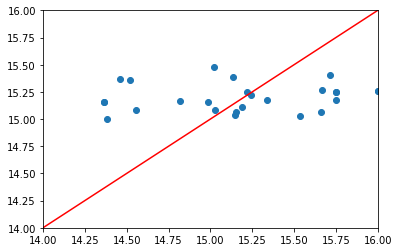

In [27]:
# first run at model - simple linear model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error

lr = LinearRegression()
model_lr = lr.fit(X_train1, y_train1)
pred_lr = model_lr.predict(X_test1)

RMSE_lr = np.sqrt(MSE(y_test1, pred_lr))
print(RMSE_lr)

plt.scatter(y_test1, pred_lr)
plt.axline([0, 0], [1, 1], c='red')
plt.xlim(14, 16)
plt.ylim(14, 16)
plt.show()

0.52764128415996


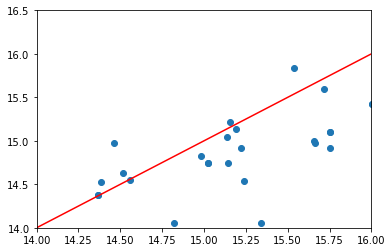

In [28]:
# simple decision tree 
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state = 0)
model_dt = dt.fit(X_train1, y_train1)
pred_dt = model_dt.predict(X_test1)

RMSE_dt = np.sqrt(MSE(y_test1, pred_dt))
print(RMSE_dt)

plt.scatter(y_test1, pred_dt)
plt.axline([0, 0], [1, 1], c='red')
plt.xlim(14, 16)
plt.ylim(14, 16.5)
plt.show()

0.49277511937017665


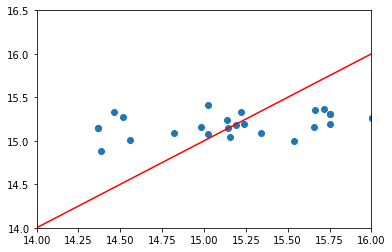

In [29]:
# random forest regressor 
from sklearn.ensemble import RandomForestRegressor 

rf = RandomForestRegressor(max_depth=2, random_state=0)
model_rf = rf.fit(X_train1, y_train1)
pred_rf = model_rf.predict(X_test1)

RMSE_rf = np.sqrt(MSE(y_test1, pred_rf))
print(RMSE_rf)

plt.scatter(y_test1, pred_rf)
plt.axline([0, 0], [1, 1], c='red')
plt.xlim(14, 16)
plt.ylim(14, 16.5)
plt.show()

0.6246884011459546


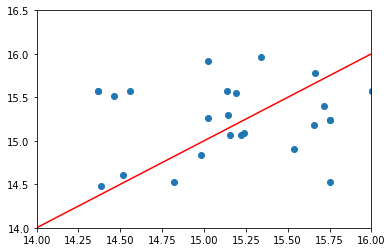

In [30]:
# knn regressor
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=2)
model_knn = knn.fit(X_train1, y_train1)
pred_knn = model_knn.predict(X_test1)

RMSE_knn = np.sqrt(MSE(y_test1, pred_knn))
print(RMSE_knn)

plt.scatter(y_test1, pred_knn)
plt.axline([0, 0], [1, 1], c='red')
plt.xlim(14, 16)
plt.ylim(14, 16.5)
plt.show()

/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 1.16.0-unknown is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 1.1build1 is an invalid version and will not be supported in a future release
  warnings.warn(


0.5265419988143943


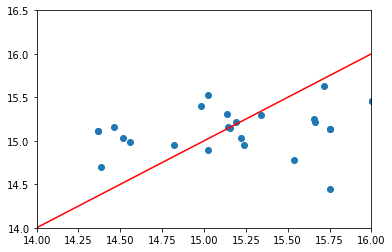

In [31]:
# xgboost regressor 
import xgboost as xgb
dtrain_reg = xgb.DMatrix(X_train1, y_train1, enable_categorical=False)
dtest_reg = xgb.DMatrix(X_test1, y_test1, enable_categorical=False)

params = {"objective": "reg:squarederror", "tree_method": "auto"}
n = 100
model_xgb = xgb.train(
   params=params,
   dtrain=dtrain_reg,
   num_boost_round=n)

pred_xgb = model_xgb.predict(dtest_reg)
RMSE_xgb = np.sqrt(MSE(y_test1, pred_xgb))
print(RMSE_xgb)

plt.scatter(y_test1, pred_xgb)
plt.axline([0, 0], [1, 1], c='red')
plt.xlim(14, 16)
plt.ylim(14, 16.5)
plt.show()

In [32]:
# now for the non_pca dataset

In [33]:
# first a linear model

In [34]:
model_lr_npca = lr.fit(X_train2, y_train2)
pred_lr_npca = model_lr_npca.predict(X_test2)

RMSE_lr_npca = np.sqrt(MSE(y_test2, pred_lr_npca))
print(RMSE_lr_npca)

model_dt_npca = dt.fit(X_train2, y_train2)
pred_dt_npca = model_dt_npca.predict(X_test2)

RMSE_dt_npca = np.sqrt(MSE(y_test2, pred_dt_npca))
print(RMSE_dt_npca)

model_rf_npca = rf.fit(X_train2, y_train2)
pred_rf_npca = model_rf_npca.predict(X_test2)

RMSE_rf_npca = np.sqrt(MSE(y_test2, pred_rf_npca))
print(RMSE_rf_npca)

model_knn_npca = knn.fit(X_train2, y_train2)
pred_knn_npca = model_knn_npca.predict(X_test2)

RMSE_knn_npca = np.sqrt(MSE(y_test2, pred_knn_npca))
print(RMSE_knn_npca)

dtrain_reg = xgb.DMatrix(X_train2, y_train2, enable_categorical=False)
dtest_reg = xgb.DMatrix(X_test2, y_test2, enable_categorical=False)

params = {"objective": "reg:squarederror", "tree_method": "auto"}
n = 100
model_xgb_npca = xgb.train(
   params=params,
   dtrain=dtrain_reg,
   num_boost_round=n)

pred_xgb_npca = model_xgb_npca.predict(dtest_reg)
RMSE_xgb_npca = np.sqrt(MSE(y_test2, pred_xgb_npca))
print(RMSE_xgb_npca)


0.41973610028520064
0.6977242830983138
0.46831764588337665
0.5205931437399149
0.42796142957389316


In [35]:
# best performance with xgboost on normal dataset, continue with that algo.

In [36]:
params = {"objective": "reg:squarederror", "tree_method": "auto"}
n = 1000

results = xgb.cv(
   params, dtrain_reg,
   num_boost_round=n,
   nfold=5,
   early_stopping_rounds=20
)


In [37]:
results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,10.338721,0.011677,10.338839,0.073251
1,7.278872,0.007886,7.278914,0.075790
2,5.130221,0.005089,5.130167,0.076802
3,3.623751,0.003049,3.623589,0.076370
4,2.570780,0.002001,2.570515,0.074377


In [38]:
results['test-rmse-mean'].min()

0.518521065158461

In [39]:
# after cross validation the outstanding RMSE result disappears
# let's try some cross validation of the PCA data random forest algo

In [40]:
from sklearn.model_selection import KFold
k5 = KFold(n_splits=5, random_state=42, shuffle=True)

for i, (train_index, test_index) in enumerate(k5.split(X_train1)):
    train = X_train1.iloc[train_index,:]
    test = X_train1.iloc[test_index,:]
    target_k5 = y_train1.iloc[train_index]
    y_test = y_train1.iloc[test_index]
    model =  rf.fit(train, target_k5)
    pred = model.predict(test)
    RMSE_rfs = np.sqrt(MSE(y_test, pred))
    print(RMSE_rfs)

0.5323405939546817
0.3813051212711284
0.5028800677787425
0.5135538997350859
0.3668534921843877


In [41]:
# results after cross validation of the random forest model don't hold up
# pivot back to the the xgboost model.  

In [42]:
# hypertune the xgboost model. 

In [43]:
from sklearn.model_selection import GridSearchCV

# create the parameter grid: gbm_param_grid
gbm_param_grid = {
    'colsample_bytree': [0.3, 0.7],
    'n_estimators': [5,50,100,1000],
    'max_depth': [6,7,8],
    'learning_rate': [0.03, 0.05, 0.1]
}

# instantiate the regressor
gbm = xgb.XGBRegressor()

# perform grid search 
grid_mse = GridSearchCV(param_grid=gbm_param_grid, estimator=gbm, 
                        scoring='neg_mean_squared_error', cv=5, verbose=1)

# fit grid_mse to the data
grid_mse.fit(X_train2, y_train2)

# print the best parameters and lowest RMSE
print("Best parameters found: ", grid_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid_mse.best_score_)))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters found:  {'colsample_bytree': 0.3, 'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 1000}
Lowest RMSE found:  0.4637471890655997


In [44]:
best_params = grid_mse.best_params_

In [45]:
# now finally use the xgboost final model configuration for the test set.

In [46]:
test = pd.read_csv('/home/jan-willem/Documents/Kaggle beginner projects/restaurant-revenue-prediction/test.csv')
test.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,...,2.0,3.0,0,0,0,0,0,0,0,0
1,1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,...,1.0,3.0,0,0,0,0,0,0,0,0
2,2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,...,2.0,3.0,0,0,0,0,0,0,0,0
3,3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,...,2.0,3.0,0,4,0,0,0,0,0,0
4,4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,...,5.0,3.0,0,0,0,0,0,0,0,0


In [47]:
# apply the same feature engineering/transformations we did to the train set:

In [48]:
years_open = (pd.to_datetime('1-1-2015') - pd.to_datetime(test['Open Date'])).astype(str).str.split(' ').apply(lambda x:int(x[0])/365)
test['years_open'] = years_open
test_dummies = pd.get_dummies(test[['City Group','Type']])
test_log = np.log(test[['P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37', 'years_open']]+1)
test_tr = pd.concat([test_log, test_dummies], axis =1)
test_tr

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P35,P36,P37,years_open,City Group_Big Cities,City Group_Other,Type_DT,Type_FC,Type_IL,Type_MB
0,0.693147,1.609438,1.609438,1.609438,0.693147,1.098612,1.791759,1.609438,1.791759,1.791759,...,0.000000,0.000000,0.000000,1.598419,0,1,0,1,0,0
1,1.386294,1.609438,1.609438,1.609438,1.098612,1.098612,1.791759,1.386294,1.609438,1.609438,...,0.000000,0.000000,0.000000,1.567474,0,1,0,0,1,0
2,1.386294,1.609438,1.609438,1.609438,1.098612,1.098612,1.791759,1.609438,1.609438,1.791759,...,0.000000,0.000000,0.000000,0.775926,1,0,0,1,0,0
3,1.098612,1.609438,1.609438,1.609438,1.098612,1.386294,1.791759,1.609438,1.791759,1.609438,...,0.000000,0.000000,0.000000,0.977399,0,1,0,0,1,0
4,1.098612,1.609438,1.609438,1.609438,0.693147,1.098612,1.791759,1.609438,1.791759,1.609438,...,0.000000,0.000000,0.000000,0.884560,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.791759,1.791759,1.609438,1.609438,1.098612,1.098612,1.791759,1.791759,1.609438,1.609438,...,0.000000,0.000000,0.000000,2.772589,0,1,0,1,0,0
99996,0.693147,1.098612,1.609438,1.386294,0.693147,0.693147,0.693147,1.791759,1.791759,1.791759,...,0.000000,0.000000,0.000000,1.495210,0,1,0,0,1,0
99997,1.609438,1.791759,1.609438,1.609438,0.693147,1.098612,1.791759,1.386294,1.609438,1.791759,...,1.609438,1.609438,1.098612,1.101348,1,0,0,0,1,0
99998,2.564949,2.140066,1.945910,1.945910,1.609438,1.609438,2.397895,2.397895,2.397895,2.397895,...,0.000000,0.000000,0.000000,0.798371,1,0,0,1,0,0


In [49]:
# now there appears another type of restaurant in the test set, not encountered in the training set.
# the share of Type MB of the whole test set is very minor, drop this feature from the test set
test_tr['Type_MB'].sum()/test_tr['Type_MB'].count()

0.0029

In [50]:
test_tr = test_tr[['P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37', 'years_open', 'City Group_Big Cities', 'City Group_Other', 'Type_DT', 'Type_FC', 'Type_IL'
                  ]]

In [51]:
# apply the optimized xgboost model on the test data.

In [52]:
gbm = xgb.XGBRegressor(params = best_params)
gbm.fit(data_nopca, target)
preds_test = gbm.predict(test_tr)
preds_test

[05:09:33] WARNING: ../src/learner.cc:627: 
Parameters: { "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




array([15.287237, 14.847038, 14.727922, ..., 14.495122, 14.925871,
       15.505696], dtype=float32)

In [53]:
# remember that the results from the model are in log form. 
# convert log outcome to normal revenue numbers:

In [54]:
final_test_results = np.exp(preds_test)

In [56]:
final_test_results

array([4356750.5, 2805348.5, 2490321.8, ..., 1973110.9, 3035451.8,
       5420487.5], dtype=float32)

In [60]:
pd.Series(final_test_results).to_csv('out.csv')